<a href="https://colab.research.google.com/github/Jintonic92/Waffleproject/blob/main/Project07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Waffle project 

## 프로젝트 주제 

- 프로젝트 이론 
- 데이터에 대한 상세 개념 정리 

## 1. 데이터 분석 

- 타겟 데이터 분포 확인 (r)
- FFT 데이터 분포 확인(r)
- 이상치 확인 plot(r)
- 상관관계 분석

In [13]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# 데이터 불러오기 
data_chc_sit = pd.read_csv('/content/drive/MyDrive/Codestates AI06/project07/log_20200909110309_chc_0.5_sit_none.csv')
data_ksj_lie = pd.read_csv('/content/drive/MyDrive/Codestates AI06/project07/log_20201111155643_ksj_0.5_lie_none.csv')
data_les_sleep = pd.read_csv('/content/drive/MyDrive/Codestates AI06/project07/log_20210811104835_les_1.0_sleep.csv')
data_sjy_lie = pd.read_csv('/content/drive/MyDrive/Codestates AI06/project07/log_20210812111825_sjy_1.0_lie_none.csv')
data_kdu_lie = pd.read_csv('/content/drive/MyDrive/Codestates AI06/project07/log_20210818153244_kdu_1.0_lie_none.csv')
data_kdu_lie2 = pd.read_csv('/content/drive/MyDrive/Codestates AI06/project07/log_20210824111504_kdu_1.0_lie_none.csv')
data_chc_lie = pd.read_csv('/content/drive/MyDrive/Codestates AI06/project07/log_20210824121025_chc_0.5_lie_none.csv')
data_kdu_lie3a = pd.read_csv('/content/drive/MyDrive/Codestates AI06/project07/log_20210824141813_kdu_1.0_lie_acryl.csv') #반투명한
data_kdu_lie4o = pd.read_csv('/content/drive/MyDrive/Codestates AI06/project07/log_20210824141815_kdu_1.0_lie_opaque.csv') #불투명한
data_gmk_lie = pd.read_csv('/content/drive/MyDrive/Codestates AI06/project07/log_20210906175352_1.0_lie_gmk.csv')
data_kdu_lie5a = pd.read_csv('/content/drive/MyDrive/Codestates AI06/project07/log_20210908142718_kdu_1.0_lie_acryl111.csv')

분석) 
개인 총 6명 (chc, ksj, les, sjy, kdu, gmak)

자세 총 3개 (sit, lie, sleep)

거리/자세 총 4개 (0.5_sit, 0.5/1.0_lie, 1.0_sleep) 

=> 개인 6명을 모두 아우를 수 있는 거리/자세 총 4가지 모델 만들 수 있을 듯 

여기서 할 수 있는 것
1. chc data sit vs lie (개인의 자세)
2. kdu lie data 5개가 있음 이 데이터간의 차이 알아보기
3. sleep vs lie vs sit 차이

=> 이를 확인하기 위해서는 각 데이터의 target 분포 확인 필요 

In [16]:
data_chc_sit.head(-30)

,Unnamed: 0,ecg,bpm,bin-2,bin-1,bin0,bin1,bin2,512fft,400fft,300fft,200fft,100fft,70fft,bin_var,motion_energy
0,0,101.298701,86.953125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
1,1,121.875000,86.989083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
2,2,121.875000,87.025041,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
3,3,121.875000,87.061000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
4,4,121.875000,87.096958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,23965,91.031941,89.765625,90.234375,90.234375,83.203125,90.234375,90.234375,83.203125,82.617188,91.992188,83.203125,85.546875,83.203125,0.2400,0.287824
23966,23966,91.031941,89.765625,90.234375,90.234375,83.203125,90.234375,90.234375,83.203125,81.445312,91.406250,83.203125,85.546875,83.203125,0.2275,0.287824
23967,23967,91.031941,89.765625,90.234375,90.234375,83.203125,90.234375,90.234375,83.203125,80.859375,90.820312,83.203125,85.546875,83.203125,0.2100,0.287824
23968,23968,91.031941,89.765625,90.234375,90.234375,83.203125,90.234375,90.234375,83.203125,40.429688,90.234375,83.203125,85.546875,83.203125,0.1875,0.287824


In [17]:
print()
# 데이터 불러오기 
data_chc_sit 
data_ksj_lie 
data_les_sleep 
data_sjy_lie 
data_kdu_lie 
data_kdu_lie2 
data_chc_lie 
data_kdu_lie3a 
data_kdu_lie4o 
data_gmk_lie 
data_kdu_lie5a 


,Unnamed: 0,ecg,bpm,bin-2,bin-1,bin0,bin1,bin2,512fft,400fft,300fft,200fft,100fft,70fft,bin_var,motion_energy
0,0,82.978723,108.750000,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000
1,1,111.428571,108.619619,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000
2,2,111.428571,108.489238,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000
3,3,111.428571,108.358858,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000
4,4,111.428571,108.228477,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1195,81.250000,108.750000,107.8125,107.8125,107.8125,108.984375,111.328125,107.8125,76.171875,85.546875,83.203125,83.203125,107.8125,15.8475,0.311092
1196,1196,81.250000,108.750000,107.8125,107.8125,107.8125,108.984375,111.328125,107.8125,76.171875,85.546875,83.203125,83.203125,107.8125,15.8100,0.311092
1197,1197,81.250000,108.750000,107.8125,107.8125,107.8125,108.984375,111.328125,107.8125,76.171875,85.546875,83.203125,83.203125,107.8125,16.3400,0.311092
1198,1198,81.250000,108.750000,107.8125,107.8125,107.8125,108.984375,111.328125,107.8125,76.171875,84.960938,83.203125,83.203125,107.8125,16.8500,0.311092


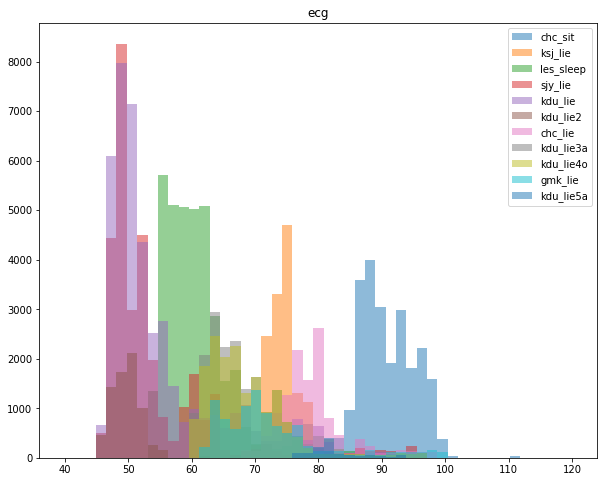

In [18]:
# 타겟값 분포 확인
bins = np.linspace(40, 120, 50)
plt.figure(figsize=(10, 8))

plt.title('ecg')
plt.hist(data_chc_sit['ecg'], bins, alpha = 0.5, label = 'chc_sit')
plt.hist(data_ksj_lie['ecg'], bins, alpha = 0.5, label = 'ksj_lie')
plt.hist(data_les_sleep['ecg'], bins, alpha = 0.5, label = 'les_sleep')
plt.hist(data_sjy_lie['ecg'], bins, alpha = 0.5, label = 'sjy_lie')
plt.hist(data_kdu_lie['ecg'], bins, alpha = 0.5, label = 'kdu_lie')
plt.hist(data_kdu_lie2['ecg'], bins, alpha = 0.5, label = 'kdu_lie2')
plt.hist(data_chc_lie['ecg'], bins, alpha = 0.5, label = 'chc_lie')
plt.hist(data_kdu_lie3a['ecg'], bins, alpha = 0.5, label = 'kdu_lie3a')
plt.hist(data_kdu_lie4o['ecg'], bins, alpha = 0.5, label = 'kdu_lie4o')
plt.hist(data_gmk_lie['ecg'], bins, alpha = 0.5, label = 'gmk_lie')
plt.hist(data_kdu_lie5a['ecg'], bins, alpha = 0.5, label = 'kdu_lie5a')
plt.legend(loc='upper right')

plt.show()

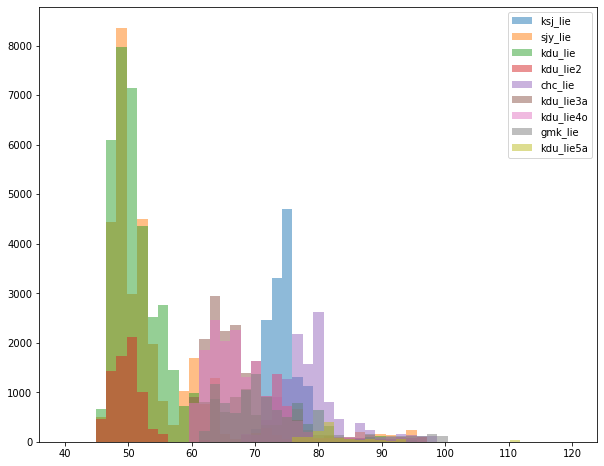

In [19]:
# lie data만 확인 
bins = np.linspace(40, 120, 50)
plt.figure(figsize=(10, 8))
plt.hist(data_ksj_lie['ecg'], bins, alpha = 0.5, label = 'ksj_lie')
plt.hist(data_sjy_lie['ecg'], bins, alpha = 0.5, label = 'sjy_lie')
plt.hist(data_kdu_lie['ecg'], bins, alpha = 0.5, label = 'kdu_lie')
plt.hist(data_kdu_lie2['ecg'], bins, alpha = 0.5, label = 'kdu_lie2')
plt.hist(data_chc_lie['ecg'], bins, alpha = 0.5, label = 'chc_lie')
plt.hist(data_kdu_lie3a['ecg'], bins, alpha = 0.5, label = 'kdu_lie3a')
plt.hist(data_kdu_lie4o['ecg'], bins, alpha = 0.5, label = 'kdu_lie4o')
plt.hist(data_gmk_lie['ecg'], bins, alpha = 0.5, label = 'gmk_lie')
plt.hist(data_kdu_lie5a['ecg'], bins, alpha = 0.5, label = 'kdu_lie5a')
plt.legend(loc='upper right')

plt.show()

해석) lie data 합쳐도 되겠다?

=> 각각 데이터에 있는 사람 각자 사람 index 부여 하고, 거리도 적고 합치자 

=> 그러면 거리와 심장 확인하는데 feature 하나 더 추가하는 것 !?

<<지훈님과 얘기해보기>>


## 2. 데이터 전처리

## 3. 모델링 (학습)


- 선형회귀모델 : base model
- Random Forest
- XGboost (CV 돌려보기) 
- SVM
- NN

## ----------------------------------------------------Testing----------------------------------------------------


### 전처리

일단 모델링을 하기 위하여 sit 0.5/lie 0.5/lie 1.0/sleep 1.0 으로 데이터 막무가내로 합치기;

In [35]:
lie_datas = [data_ksj_lie, data_sjy_lie, data_kdu_lie, data_kdu_lie2, data_chc_lie, data_kdu_lie3a, data_kdu_lie4o, data_gmk_lie, data_kdu_lie5a]
lie_data = pd.concat(lie_datas, ignore_index=True)

In [36]:
lie_data

,Unnamed: 0,ecg,bpm,bin-2,bin-1,bin0,bin1,bin2,512fft,400fft,300fft,200fft,100fft,70fft,bin_var,motion_energy
0,0,69.026549,67.968750,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,9.1875,0.000000
1,1,74.285714,67.980391,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,9.1875,0.000000
2,2,74.285714,67.992032,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,9.1875,0.000000
3,3,74.285714,68.003673,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,9.1875,0.000000
4,4,74.285714,68.015315,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,9.1875,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152395,1195,81.250000,108.750000,107.8125,107.8125,107.8125,108.984375,111.328125,107.8125,76.171875,85.546875,83.203125,83.203125,107.8125,15.8475,0.311092
152396,1196,81.250000,108.750000,107.8125,107.8125,107.8125,108.984375,111.328125,107.8125,76.171875,85.546875,83.203125,83.203125,107.8125,15.8100,0.311092
152397,1197,81.250000,108.750000,107.8125,107.8125,107.8125,108.984375,111.328125,107.8125,76.171875,85.546875,83.203125,83.203125,107.8125,16.3400,0.311092
152398,1198,81.250000,108.750000,107.8125,107.8125,107.8125,108.984375,111.328125,107.8125,76.171875,84.960938,83.203125,83.203125,107.8125,16.8500,0.311092


In [37]:
lie_data.isnull().sum()

Unnamed: 0       0
ecg              0
bpm              0
bin-2            0
bin-1            0
bin0             0
bin1             0
bin2             0
512fft           0
400fft           0
300fft           0
200fft           0
100fft           0
70fft            0
bin_var          0
motion_energy    0
dtype: int64

In [38]:
lie_data.dtypes

Unnamed: 0         int64
ecg              float64
bpm              float64
bin-2            float64
bin-1            float64
bin0             float64
bin1             float64
bin2             float64
512fft           float64
400fft           float64
300fft           float64
200fft           float64
100fft           float64
70fft            float64
bin_var          float64
motion_energy    float64
dtype: object

In [39]:
lie_data.describe

<bound method NDFrame.describe of         Unnamed: 0        ecg         bpm  ...     70fft  bin_var  motion_energy
0                0  69.026549   67.968750  ...    0.0000   9.1875       0.000000
1                1  74.285714   67.980391  ...    0.0000   9.1875       0.000000
2                2  74.285714   67.992032  ...    0.0000   9.1875       0.000000
3                3  74.285714   68.003673  ...    0.0000   9.1875       0.000000
4                4  74.285714   68.015315  ...    0.0000   9.1875       0.000000
...            ...        ...         ...  ...       ...      ...            ...
152395        1195  81.250000  108.750000  ...  107.8125  15.8475       0.311092
152396        1196  81.250000  108.750000  ...  107.8125  15.8100       0.311092
152397        1197  81.250000  108.750000  ...  107.8125  16.3400       0.311092
152398        1198  81.250000  108.750000  ...  107.8125  16.8500       0.311092
152399        1199  81.250000  108.750000  ...  107.8125  16.4475       0.3

In [40]:
# 결측값이 있는 특성을 찾습니다.
[(x, lie_data[x].isnull().sum()) for x in lie_data.columns if lie_data[x].isnull().any()]

[]

In [42]:
# 0을 포함한 특성을 찾습니다.
[(x, lie_data[x].isna().sum()) for x in lie_data.columns if lie_data[x].isna().any()]

[]

In [45]:
lie_data.isna().sum()

Unnamed: 0       0
ecg              0
bpm              0
bin-2            0
bin-1            0
bin0             0
bin1             0
bin2             0
512fft           0
400fft           0
300fft           0
200fft           0
100fft           0
70fft            0
bin_var          0
motion_energy    0
dtype: int64

In [47]:
(lie_data == 0.0000).sum()

Unnamed: 0           9
ecg                  0
bpm                  0
bin-2              512
bin-1              531
bin0               591
bin1               597
bin2               620
512fft             591
400fft           20152
300fft            2403
200fft             591
100fft             591
70fft              591
bin_var          72356
motion_energy      180
dtype: int64

### linear regression (raw)

In [57]:
pip install category_encoders

     |████████████████████████████████| 82 kB 334 kB/s 


In [58]:
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [75]:
train, val = train_test_split(lie_data, test_size=0.2)
target = 'ecg'
features = train.drop(columns=[target, 'bpm']).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [76]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(121920, 14)
(121920,)
(30480, 14)
(30480,)


In [77]:
linear = make_pipeline(
    LinearRegression()
)
linear.fit(X_train, y_train)
print('훈련 정확도', linear.score(X_train, y_train))
print('검증 정확도', linear.score(X_test, y_test))


훈련 정확도 0.4195199485399458
검증 정확도 0.43107528436995124


In [78]:
coefficients = linear.named_steps['linearregression'].coef_
pd.Series(coefficients, features)

Unnamed: 0      -0.000565
bin-2            0.057841
bin-1            0.067388
bin0            -0.003844
bin1             0.043874
bin2            -0.020027
512fft          -0.003844
400fft           0.007286
300fft           0.008346
200fft           0.004709
100fft           0.003848
70fft            0.009242
bin_var          0.219587
motion_energy    1.027453
dtype: float64

### linear regression (+)

### Random forest regressor

A random forest classifier works with data having discrete labels or better known as class. 

Example- A patient is suffering from cancer or not, a person is eligible for a loan or not, etc.
A random forest regressor works with data having a numeric or continuous output and they cannot be defined by classes.
Example- the price of houses, milk production of cows, the gross income of companies, etc.

In [79]:
from category_encoders import TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [80]:
#이는 AI03기 분꺼 그대로 베껴온것 (심지어 파라미터 설정까지)
rfregressor = make_pipeline(
    TargetEncoder(smoothing=150.0),
    SimpleImputer(),
    StandardScaler(),
    RandomForestRegressor(n_estimators=200, max_depth=14, random_state=1)
)

rfregressor.fit(X_train, y_train)

print('훈련 정확도', rfregressor.score(X_train, y_train))
print('검증 정확도', rfregressor.score(X_val, y_val))

훈련 정확도 0.9688335992880336
검증 정확도 0.9648257407146933


## 4. 모델링 (결과)


## 5. 모델링 (개선점)


- Log Transform 
- RandomForestRegressor
- Hyperparameter tuning


## 6. 모델링 (최고 성능 모델 뽑기!)